In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from compute_bounding_box import run

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
file_paths = [p for p in Path().glob("data/output_*/*")]

output_paths = [p for p in file_paths if "output" in p.name]
floor_path = Path("data/floor.csv")

In [4]:
def get_target_size(input_path):
    with open(input_path, "r") as f:
        target_size = [] 
        for _ in range(3): 
            line = f.readline()
            dim = int(line[7:-1])
            target_size.append(dim) 

    return tuple(target_size)

In [16]:
results = {}

for item_pcd_file_path in output_paths:
    measured_size = run(item_pcd_file_path, floor_path, visualize=False)

    input_path = item_pcd_file_path.parent / "input.txt"
    target_size = get_target_size(input_path)


    e1 = abs(measured_size[0] - target_size[0])
    e2 = abs(measured_size[1] - target_size[1])
    e3 = abs(measured_size[2] - target_size[2])

    id_ = item_pcd_file_path.name[7:-4]

    max_error_abs = np.max([e1,e2,e3])
    idx_max_error = np.argmax([e1,e2,e3])
    max_error_rel = max_error_abs / target_size[idx_max_error]

    results[id_] = (measured_size, target_size, e1, e2, e3, max_error_abs, max_error_rel, idx_max_error)

In [18]:
results_df = pd.DataFrame(results).T
results_df.columns = ["measured_size", "target_size", "e1", "e2", "e3", "max_error_abs", "max_error_rel", "idx_max_error"]
results_df = results_df.sort_values(by="max_error_abs", ascending=False)
results_df

,measured_size,target_size,e1,e2,e3,max_error_abs,max_error_rel,idx_max_error
11,"(52, 94, 249)","(60, 94, 290)",8,0,41,41,0.141379,2
12,"(69, 62, 146)","(76, 76, 175)",7,14,29,29,0.165714,2
6,"(44, 101, 83)","(50, 109, 109)",6,8,26,26,0.238532,2
15,"(55, 60, 166)","(70, 70, 190)",15,10,24,24,0.126316,2
17,"(202, 57, 63)","(205, 75, 85)",3,18,22,22,0.258824,2
13,"(53, 51, 115)","(54, 54, 135)",1,3,20,20,0.148148,2
5,"(13, 48, 115)","(13, 55, 135)",0,7,20,20,0.148148,2
9,"(67, 51, 75)","(85, 55, 85)",18,4,10,18,0.211765,0
10,"(58, 56, 166)","(65, 65, 180)",7,9,14,14,0.077778,2
7,"(78, 122, 166)","(78, 120, 180)",0,2,14,14,0.077778,2


<Axes: title={'center': 'dimension at which maximum measuremed error is at'}, xlabel='count', ylabel='dim'>

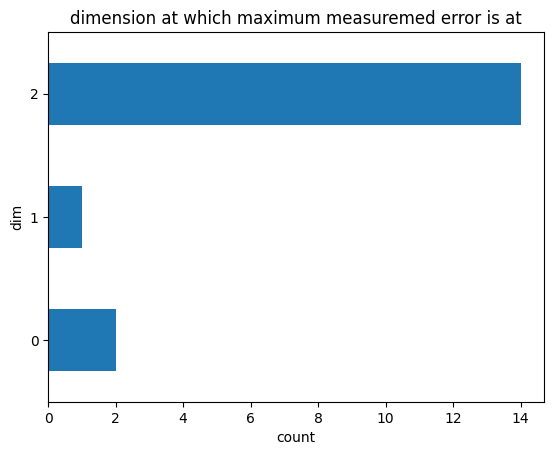

In [27]:
results_df["idx_max_error"].value_counts().sort_index().plot.barh(ylabel="dim", xlabel="count", title="dimension at which maximum measuremed error is at")

<Axes: title={'center': 'below 1 cm mistake is ok, above 3 is not.'}, xlabel='absolute maximum error among all dimensions', ylabel='count'>

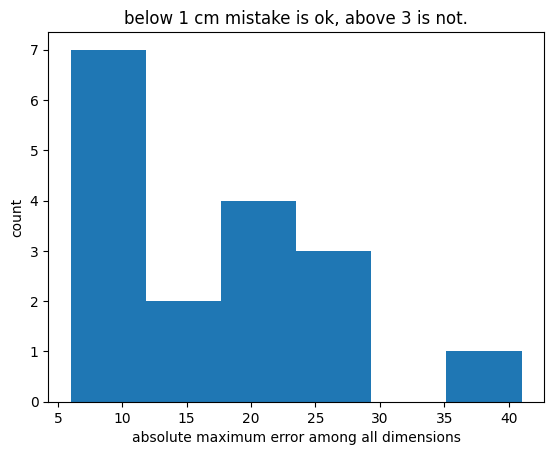

In [44]:
results_df["max_error_abs"].plot.hist(
    bins=6, 
    xlabel="absolute maximum error among all dimensions", 
    ylabel="count", 
    title="below 1 cm mistake is ok, above 3 is not."
)

<Axes: title={'center': 'below 1 cm mistake is ok, above 3 is not.'}, xlabel='rel maximum error among all dimensions', ylabel='count'>

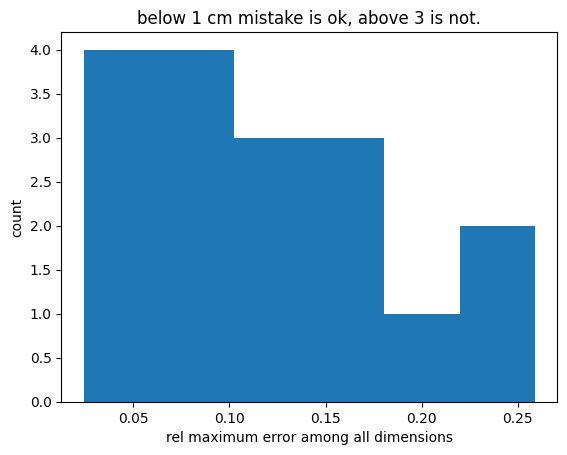

In [46]:
results_df["max_error_rel"].plot.hist(
    bins=6, 
    xlabel="rel maximum error among all dimensions", 
    ylabel="count", 
    title="below 1 cm mistake is ok, above 3 is not."
)